In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import integrate
import matplotlib.pyplot as plt

%precision 4


'%.4f'

균일확률분포

In [3]:
def f(x):
    x_range = np.array([200,400])
    if x_range[0] < x_range[1]:
        return 1/(400-200)
    else:
        return 0

In [4]:
a = 200
b = 400
mu = (a+b) / 2
var = (b-a) ** 2/12

mu, var

(300.0000, 3333.3333)

In [5]:
def P(alpha, beta):
    return integrate.quad(f, alpha, beta)[0]

P(250,300)

0.2500

In [6]:
P(300,300)

0.0000

정규분포

In [7]:
def pi(mu, sigma):
    def f(x):
        return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp((-1/2)*((x-mu)/sigma)**2)
    return f

def P(mu, sigma, X):
    Z = (X - mu) / sigma
    return Z, integrate.quad(pi(mu, sigma), -np.inf, X)[0]


In [8]:
mu = 1000
sigma = 100

P(mu, sigma, 1100)

(1.0000, 0.8413)

표준정규분포

In [9]:
def P_2(Z):
    return integrate.quad(pi(0, 1), -np.inf, Z)[0]

In [10]:
P_2(1)

0.8413

이항확률의 정규근사

In [11]:
n = 100
p = 0.1

mu = n * p
var = n*p*(1-p)
sigma = np.sqrt(var)

mu, var, sigma

(10.0000, 9.0000, 3.0000)

x = 12 ==> 11.5 <= x <= 12.5

In [12]:
P(mu, sigma, 12.5)

(0.8333, 0.7977)

In [13]:
P(mu, sigma, 11.5)

(0.5000, 0.6915)

In [14]:
P(mu, sigma, 12.5)[1] - P(mu, sigma, 11.5)[1]

0.1062

In [15]:
def P_2(Z):
    def f(x):
        return 1 / (np.sqrt(2 * np.pi)) * np.exp((-1/2)* (x**2))
    return integrate.quad(f, -np.inf, Z)[0]

In [16]:
a = np.round(P_2(0.83), 4)
b = np.round(P_2(0.5), 4)

In [17]:
a-b

0.1052

지수분포

In [18]:
def exp_prob(lam, x):
    return 1 - np.exp(-lam * x)

In [19]:
mu = 10
lam = 1 / mu
exp_prob(lam, 15) - exp_prob(lam, 10) 


0.1447

카이제곱

<function matplotlib.pyplot.show(close=None, block=None)>

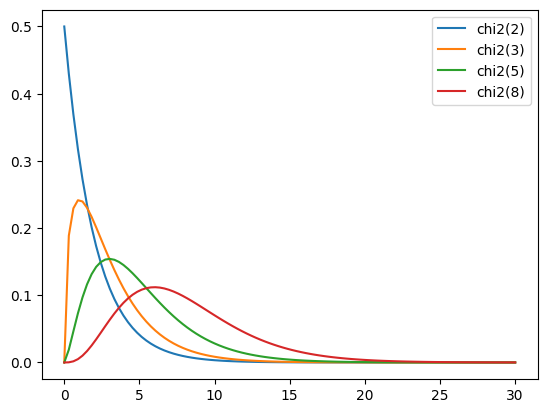

In [21]:
n = 2
rv_chi = stats.chi2(n)
xs = np.linspace(0, 30, 100)
plt.plot(xs, rv_chi.pdf(xs), label=f'chi2({n})')

n = 3
rv_chi = stats.chi2(n)
xs = np.linspace(0, 30, 100)
plt.plot(xs, rv_chi.pdf(xs), label=f'chi2({n})')

n = 5
rv_chi = stats.chi2(n)
xs = np.linspace(0, 30, 100)
plt.plot(xs, rv_chi.pdf(xs), label=f'chi2({n})')

n = 8
rv_chi = stats.chi2(n)
xs = np.linspace(0, 30, 100)
plt.plot(xs, rv_chi.pdf(xs), label=f'chi2({n})')

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

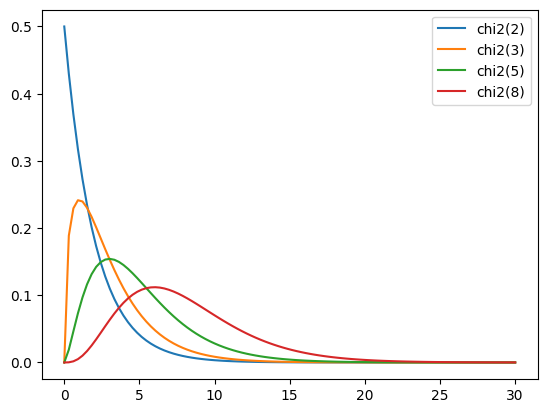

In [22]:
for n in [2,3,5,8]:
    rv_chi = stats.chi2(n)
    xs = np.linspace(0, 30, 100)
    plt.plot(xs, rv_chi.pdf(xs), label=f'chi2({n})')

plt.legend()
plt.show

In [23]:
rv_chi = stats.chi2(8)
rv_chi.isf(0.95)

2.7326

In [24]:
rv_chi.isf(0.05)

15.5073

student t분포

<function matplotlib.pyplot.show(close=None, block=None)>

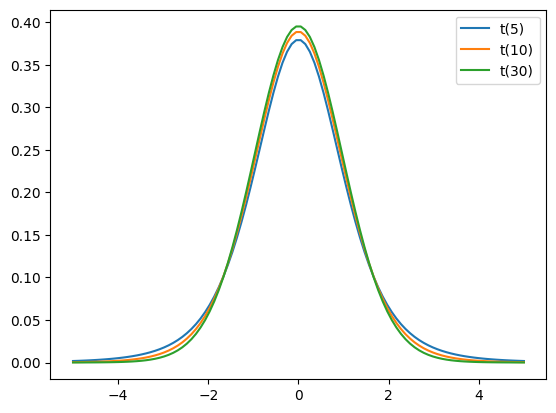

In [31]:
for n in [5, 10, 30]:
    rv_t = stats.t(n)
    xs = np.linspace(-5, 5, 100)
    plt.plot(xs, rv_t.pdf(xs), label=f't({n})')

plt.legend()
plt.show

In [33]:
rv_t = stats.t(10)
rv_t.isf(0.05)

1.8125

F분포

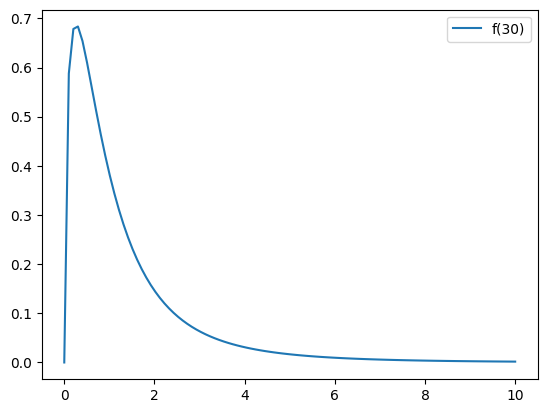

In [36]:
rv_f = stats.f(3,7)
xs = np.linspace(0, 10, 100)
plt.plot(xs, rv_f.pdf(xs), label=f'f({n})')

plt.legend()
plt.show;

In [37]:
rv_f.isf(0.05)

4.3468

In [38]:
rv_f2 = stats.f(10, 7)
rv_f3 = stats.f(7, 10)

In [39]:
rv_f2.isf(0.99)

0.1923

In [40]:
1 / rv_f3.isf(0.01)

0.1923